<a href="https://colab.research.google.com/github/thiagomacielbarbosa/data-engineer-analytics/blob/main/Materiais_de_Agricultura_GH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Agricultural-raw-material-prices

In [2]:
!pip install opendatasets pandas matplotlib seaborn numpy --quiet

import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("✅ Bibliotecas instaladas e importadas com sucesso!")

✅ Bibliotecas instaladas e importadas com sucesso!


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving agricultural_raw_material.csv to agricultural_raw_material (1).csv


In [ ]:
import os
os.makedirs('/root/.kaggle', exist_ok=True)

In [ ]:
for filename in uploaded.keys():
    os.rename(filename, f'/root/.kaggle/{filename}')
    os.chmod(f'/root/.kaggle/{filename}', 0o600)

In [ ]:
!kaggle datasets download -d nathanielgumbs/agricultural-raw-material-prices-19902020

In [ ]:
df = pd.read_csv('/content/agricultural_raw_material.csv')
display(df.head())

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
0,Apr-90,482.34,-,236,-,1.83,-,"1,071.63",-,161.20,...,312.36,-,0.84,-,120.66,-,218.76,-,829.29,-
1,May-90,447.26,-7.27%,234,-0.85%,1.89,3.28%,"1,057.18",-1.35%,172.86,...,350.12,12.09%,0.85,1.19%,124.28,3.00%,213.00,-2.63%,842.51,1.59%
2,Jun-90,440.99,-1.40%,216,-7.69%,1.99,5.29%,898.24,-15.03%,181.67,...,373.94,6.80%,0.85,0.00%,129.45,4.16%,200.00,-6.10%,831.35,-1.32%
3,Jul-90,418.44,-5.11%,205,-5.09%,2.01,1.01%,895.83,-0.27%,187.96,...,378.48,1.21%,0.86,1.18%,124.23,-4.03%,210.05,5.03%,798.83,-3.91%
4,Aug-90,418.44,0.00%,198,-3.41%,1.79,-10.95%,951.22,6.18%,186.13,...,364.60,-3.67%,0.88,2.33%,129.70,4.40%,208.30,-0.83%,818.74,2.49%


In [ ]:
print("📊 Dimensões do Dataset:", df.shape)
print("\n🔍 Primeiras 5 linhas:")
display(df.head())

📊 Dimensões do Dataset: (361, 25)

🔍 Primeiras 5 linhas:


,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
0,Apr-90,482.34,-,236,-,1.83,-,"1,071.63",-,161.20,...,312.36,-,0.84,-,120.66,-,218.76,-,829.29,-
1,May-90,447.26,-7.27%,234,-0.85%,1.89,3.28%,"1,057.18",-1.35%,172.86,...,350.12,12.09%,0.85,1.19%,124.28,3.00%,213.00,-2.63%,842.51,1.59%
2,Jun-90,440.99,-1.40%,216,-7.69%,1.99,5.29%,898.24,-15.03%,181.67,...,373.94,6.80%,0.85,0.00%,129.45,4.16%,200.00,-6.10%,831.35,-1.32%
3,Jul-90,418.44,-5.11%,205,-5.09%,2.01,1.01%,895.83,-0.27%,187.96,...,378.48,1.21%,0.86,1.18%,124.23,-4.03%,210.05,5.03%,798.83,-3.91%
4,Aug-90,418.44,0.00%,198,-3.41%,1.79,-10.95%,951.22,6.18%,186.13,...,364.60,-3.67%,0.88,2.33%,129.70,4.40%,208.30,-0.83%,818.74,2.49%


In [ ]:
print("\n📋 Informações sobre colunas:")
df.info()


📋 Informações sobre colunas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Month                         361 non-null    object 
 1   Coarse wool Price             327 non-null    object 
 2   Coarse wool price % Change    327 non-null    object 
 3   Copra Price                   339 non-null    object 
 4   Copra price % Change          339 non-null    object 
 5   Cotton Price                  361 non-null    float64
 6   Cotton price % Change         361 non-null    object 
 7   Fine wool Price               327 non-null    object 
 8   Fine wool price % Change      327 non-null    object 
 9   Hard log Price                361 non-null    float64
 10  Hard log price % Change       361 non-null    object 
 11  Hard sawnwood Price           327 non-null    float64
 12  Hard sawnwood price % Change  327 

In [ ]:
print("\n🎯 Estatísticas descritivas:")
display(df.describe())


🎯 Estatísticas descritivas:


,Cotton Price,Hard log Price,Hard sawnwood Price,Hide Price,Plywood Price,Rubber Price,Softlog Price,Soft sawnwood Price,Wood pulp Price
count,361.000000,361.000000,327.000000,327.000000,361.000000,361.000000,327.000000,327.000000,360.000000
mean,1.640000,251.034072,707.950367,78.566667,508.216122,1.656427,164.527462,291.061713,696.670889
std,0.513319,65.628406,144.563241,13.690623,89.274718,1.017086,25.596308,34.113959,161.156936
min,0.820000,133.280000,413.370000,28.590000,312.360000,0.490000,119.350000,183.610000,384.000000
25%,1.290000,197.960000,573.470000,69.495000,442.540000,0.860000,145.970000,277.590000,549.777500
50%,1.600000,253.010000,728.710000,77.250000,505.040000,1.440000,160.370000,294.960000,693.580000
75%,1.850000,282.970000,831.635000,86.000000,570.790000,2.060000,180.210000,310.865000,875.000000
max,5.060000,520.810000,973.600000,114.630000,751.810000,6.260000,259.970000,372.600000,966.490000


In [ ]:
print("🔍 VALORES NULOS POR COLUNA:")
null_analysis = pd.DataFrame({
    'Valores_Nulos': df.isnull().sum(),
    'Percentual_Nulos': (df.isnull().sum() / len(df)) * 100
})
display(null_analysis[null_analysis['Valores_Nulos'] > 0])

🔍 VALORES NULOS POR COLUNA:


,Valores_Nulos,Percentual_Nulos
Coarse wool Price,34,9.418283
Coarse wool price % Change,34,9.418283
Copra Price,22,6.094183
Copra price % Change,22,6.094183
Fine wool Price,34,9.418283
Fine wool price % Change,34,9.418283
Hard sawnwood Price,34,9.418283
Hard sawnwood price % Change,34,9.418283
Hide Price,34,9.418283
Hide price % change,34,9.418283


In [ ]:
df_clean = df.copy()

In [ ]:
numeric_columns = df_clean.select_dtypes(include=[np.number]).columns
df_clean[numeric_columns] = df_clean[numeric_columns].fillna(df_clean[numeric_columns].median())
print("✅ Valores nulos tratados!")
print(f"Valores nulos restantes: {df_clean.isnull().sum().sum()}")

✅ Valores nulos tratados!
Valores nulos restantes: 317


In [ ]:
print("🔄 Conversão de tipos de dados...")


🔄 Conversão de tipos de dados...


In [ ]:
for col in df_clean.columns:
    if col != 'Month' and df_clean[col].dtype == 'object':
        df_clean[col] = df_clean[col].astype(str).str.replace('%', '').str.replace(',', '')
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

df_clean['Month'] = pd.to_datetime(df_clean['Month'], format='%b-%y')
print("✅ Conversão de tipos de dados concluída!")
print("✅ Tipos de dados corrigidos!")
print("\n📊 Tipos de dados finais:")
print(df_clean.dtypes)

✅ Conversão de tipos de dados concluída!
✅ Tipos de dados corrigidos!

📊 Tipos de dados finais:
Month                           datetime64[ns]
Coarse wool Price                      float64
Coarse wool price % Change             float64
Copra Price                            float64
Copra price % Change                   float64
Cotton Price                           float64
Cotton price % Change                  float64
Fine wool Price                        float64
Fine wool price % Change               float64
Hard log Price                         float64
Hard log price % Change                float64
Hard sawnwood Price                    float64
Hard sawnwood price % Change           float64
Hide Price                             float64
Hide price % change                    float64
Plywood Price                          float64
Plywood price % Change                 float64
Rubber Price                           float64
Rubber price % Change                  float64
Softlog Pri

📈 DISTRIBUIÇÃO DAS VARIÁVEIS NUMÉRICAS:


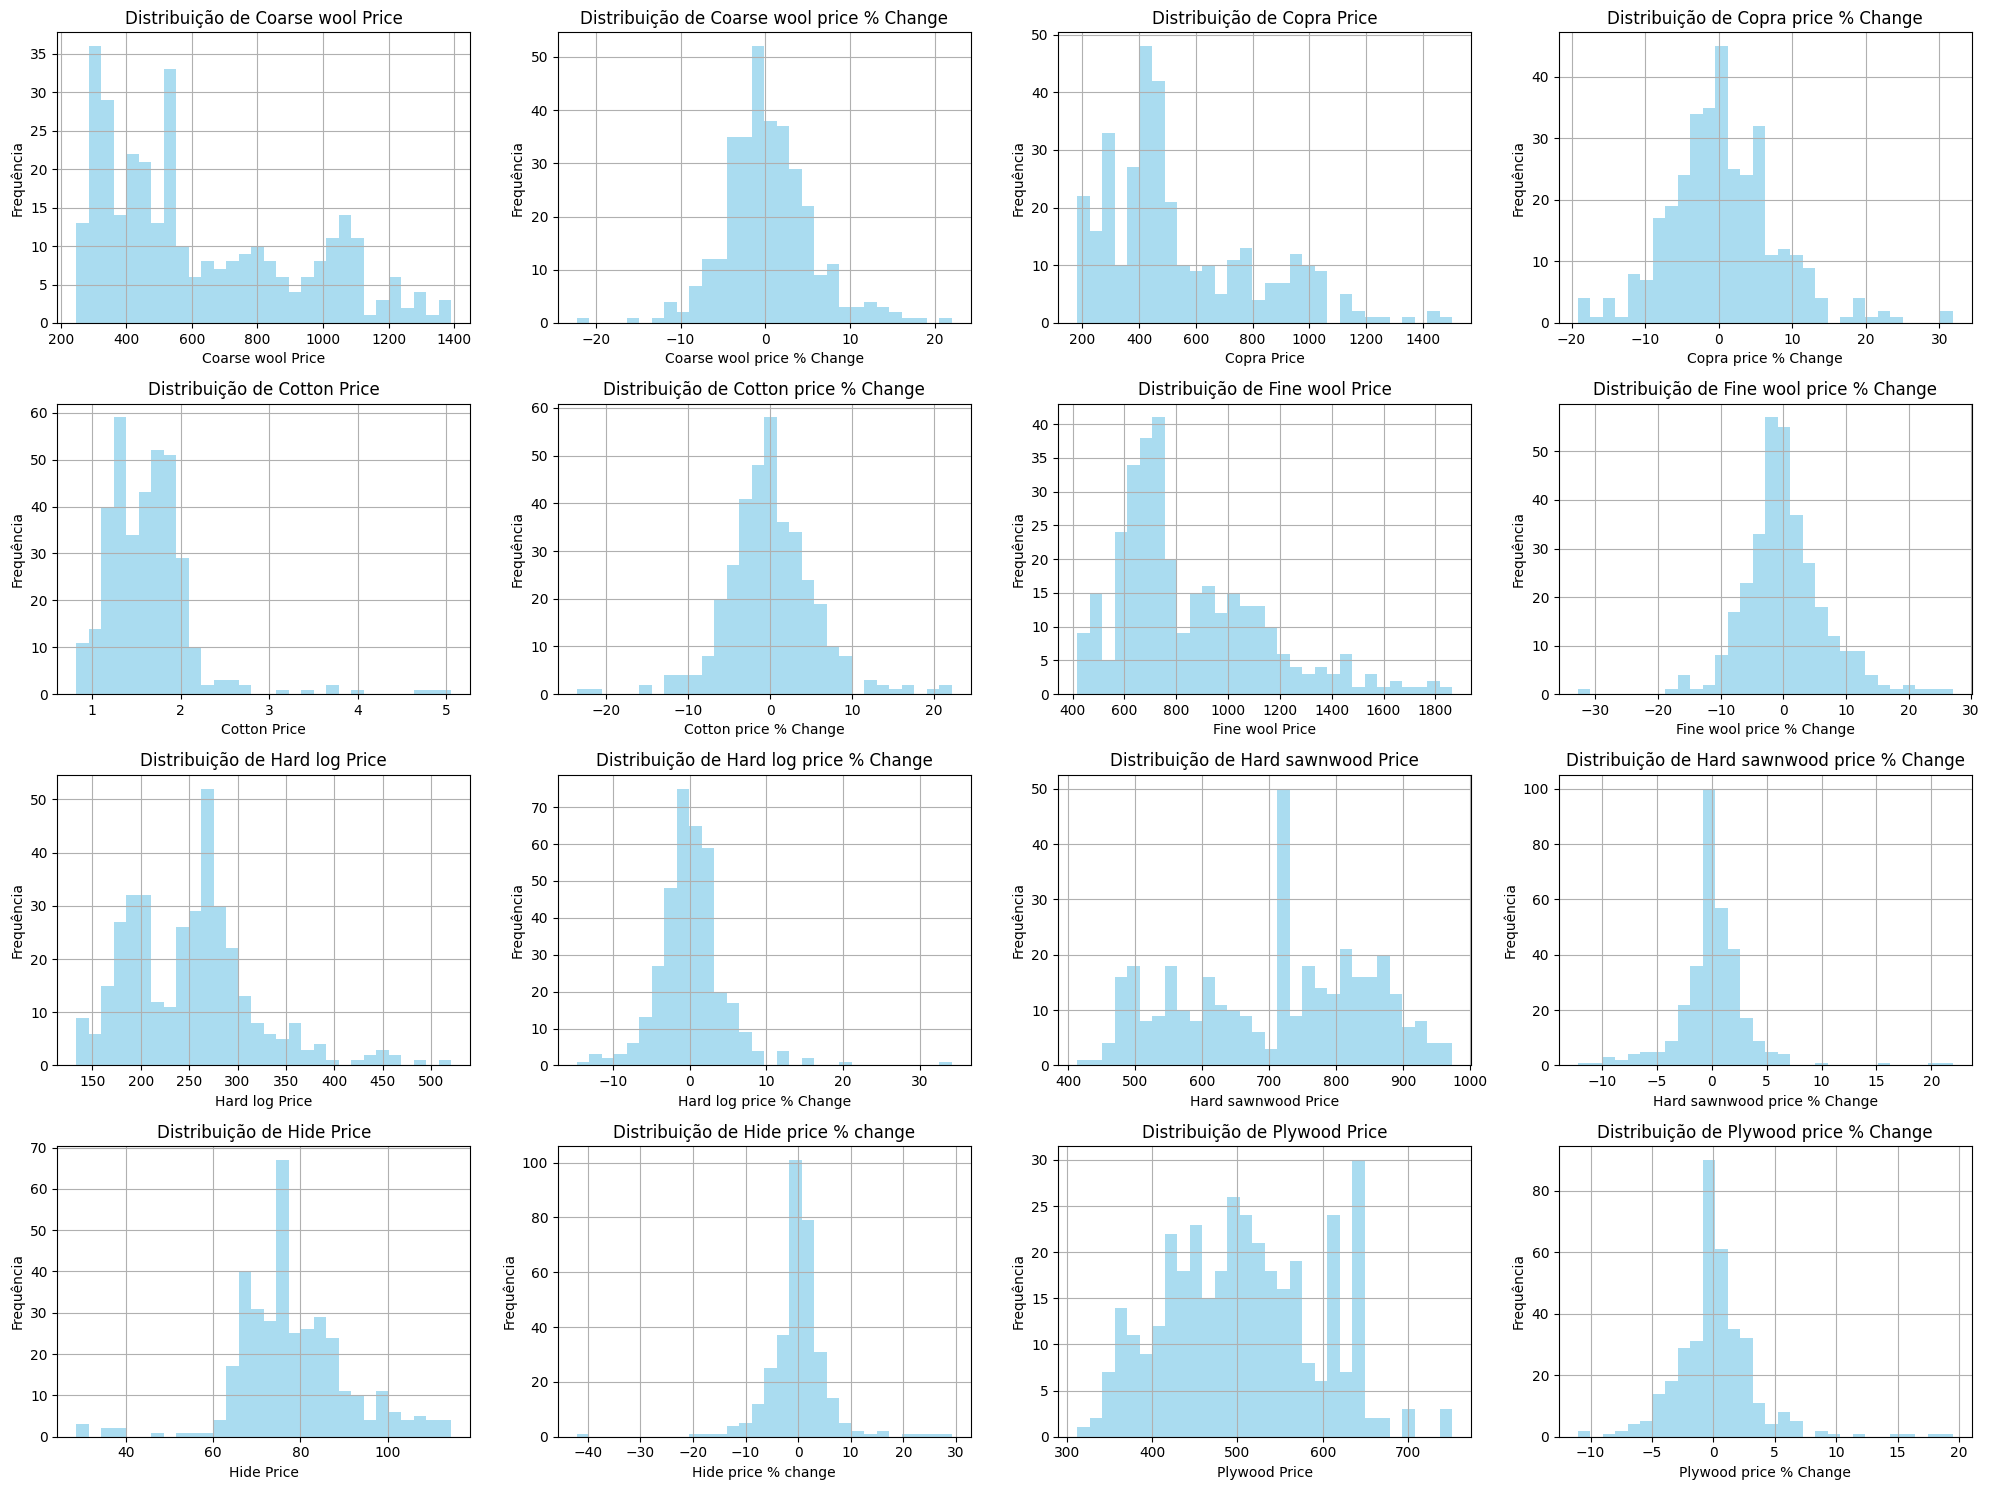

In [ ]:
print("📈 DISTRIBUIÇÃO DAS VARIÁVEIS NUMÉRICAS:")

numeric_cols = df_clean.select_dtypes(include=[np.number]).columns

fig, axes = plt.subplots(4, 4, figsize=(20, 15))
axes = axes.ravel()

for i, col in enumerate(numeric_cols):
    if i < len(axes):
        df_clean[col].hist(bins=30, ax=axes[i], alpha=0.7, color='skyblue')
        axes[i].set_title(f'Distribuição de {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequência')

for j in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

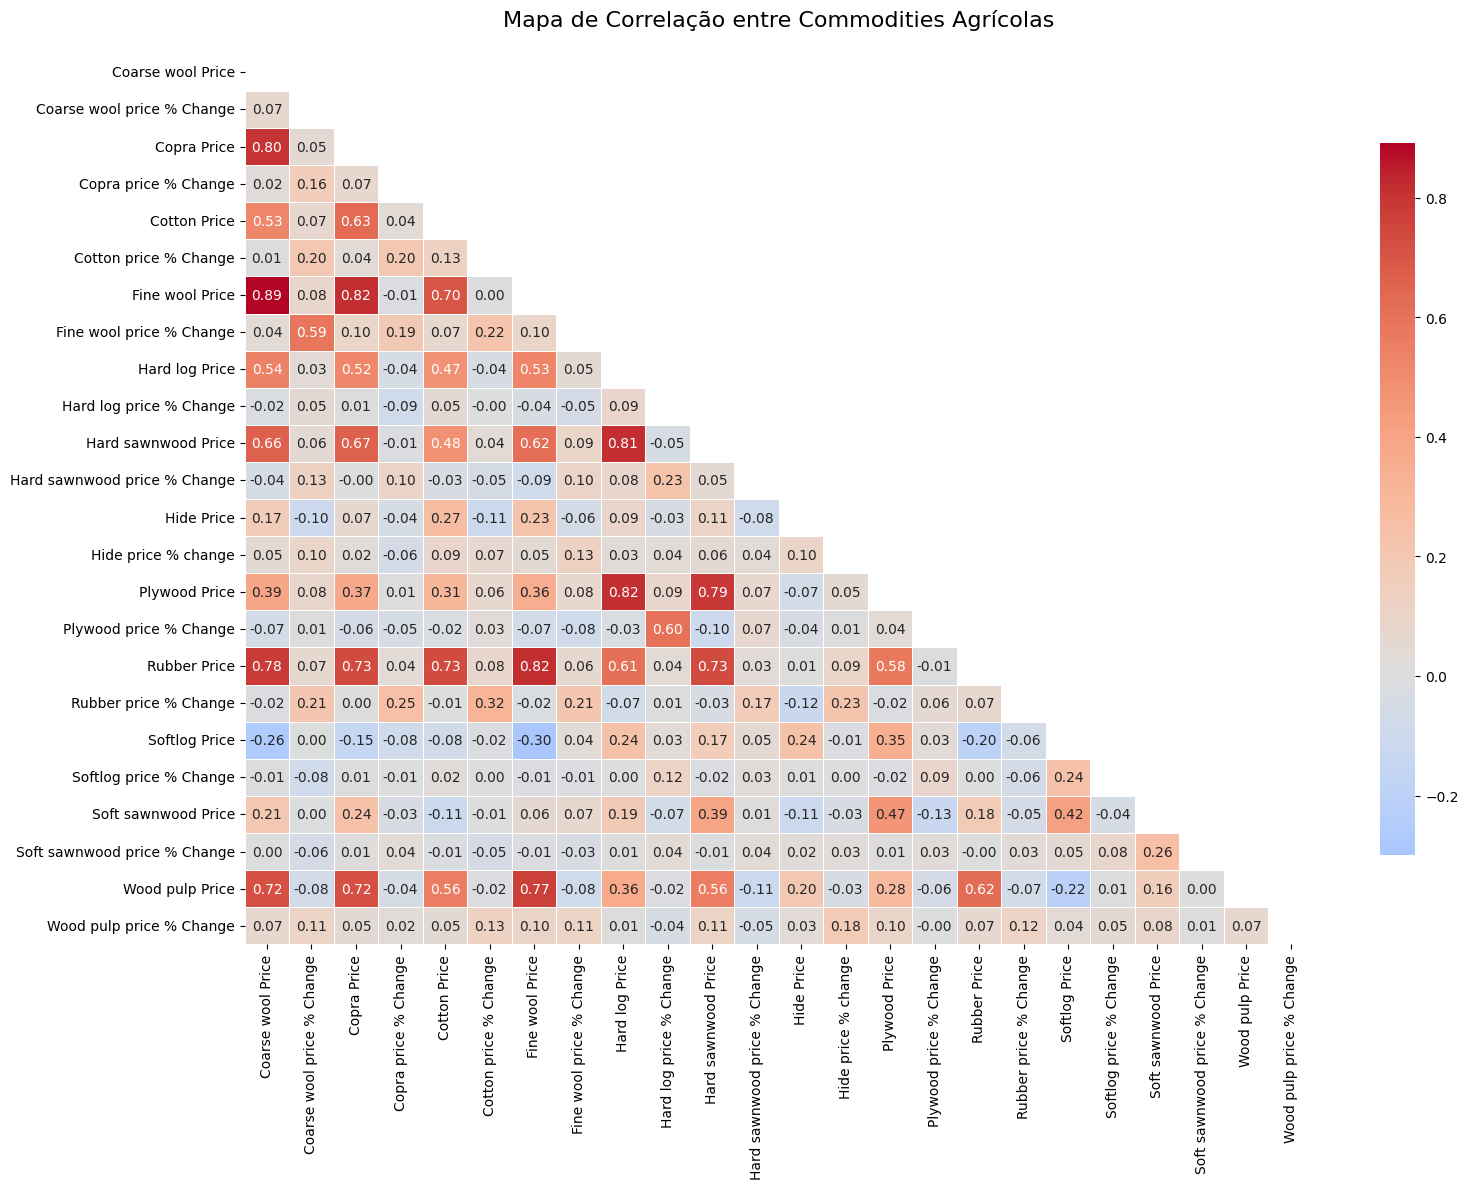

🔗 CORRELAÇÕES FORTES IDENTIFICADAS (|r| > 0.5):
   Coarse wool Price ↔ Copra Price: 0.801
   Coarse wool Price ↔ Cotton Price: 0.528
   Coarse wool Price ↔ Fine wool Price: 0.892
   Coarse wool Price ↔ Hard log Price: 0.544
   Coarse wool Price ↔ Hard sawnwood Price: 0.664


In [ ]:
plt.figure(figsize=(16, 12))
correlation_matrix = df_clean[numeric_cols].corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Mapa de Correlação entre Commodities Agrícolas', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

print("🔗 CORRELAÇÕES FORTES IDENTIFICADAS (|r| > 0.5):")
strong_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.5:
            strong_correlations.append(
                (correlation_matrix.columns[i], correlation_matrix.columns[j],
                 correlation_matrix.iloc[i, j])
            )

for corr in strong_correlations[:5]:
    print(f"   {corr[0]} ↔ {corr[1]}: {corr[2]:.3f}")

In [ ]:
print(df_clean.columns)

Index(['Month', 'Coarse wool Price', 'Coarse wool price % Change',
       'Copra Price', 'Copra price % Change', 'Cotton Price',
       'Cotton price % Change', 'Fine wool Price', 'Fine wool price % Change',
       'Hard log Price', 'Hard log price % Change', 'Hard sawnwood Price',
       'Hard sawnwood price % Change', 'Hide Price', 'Hide price % change',
       'Plywood Price', 'Plywood price % Change', 'Rubber Price',
       'Rubber price % Change', 'Softlog Price', 'Softlog price % Change',
       'Soft sawnwood Price', 'Soft sawnwood price % Change',
       'Wood pulp Price', 'Wood pulp price % Change'],
      dtype='object')


<Figure size 1500x1000 with 0 Axes>

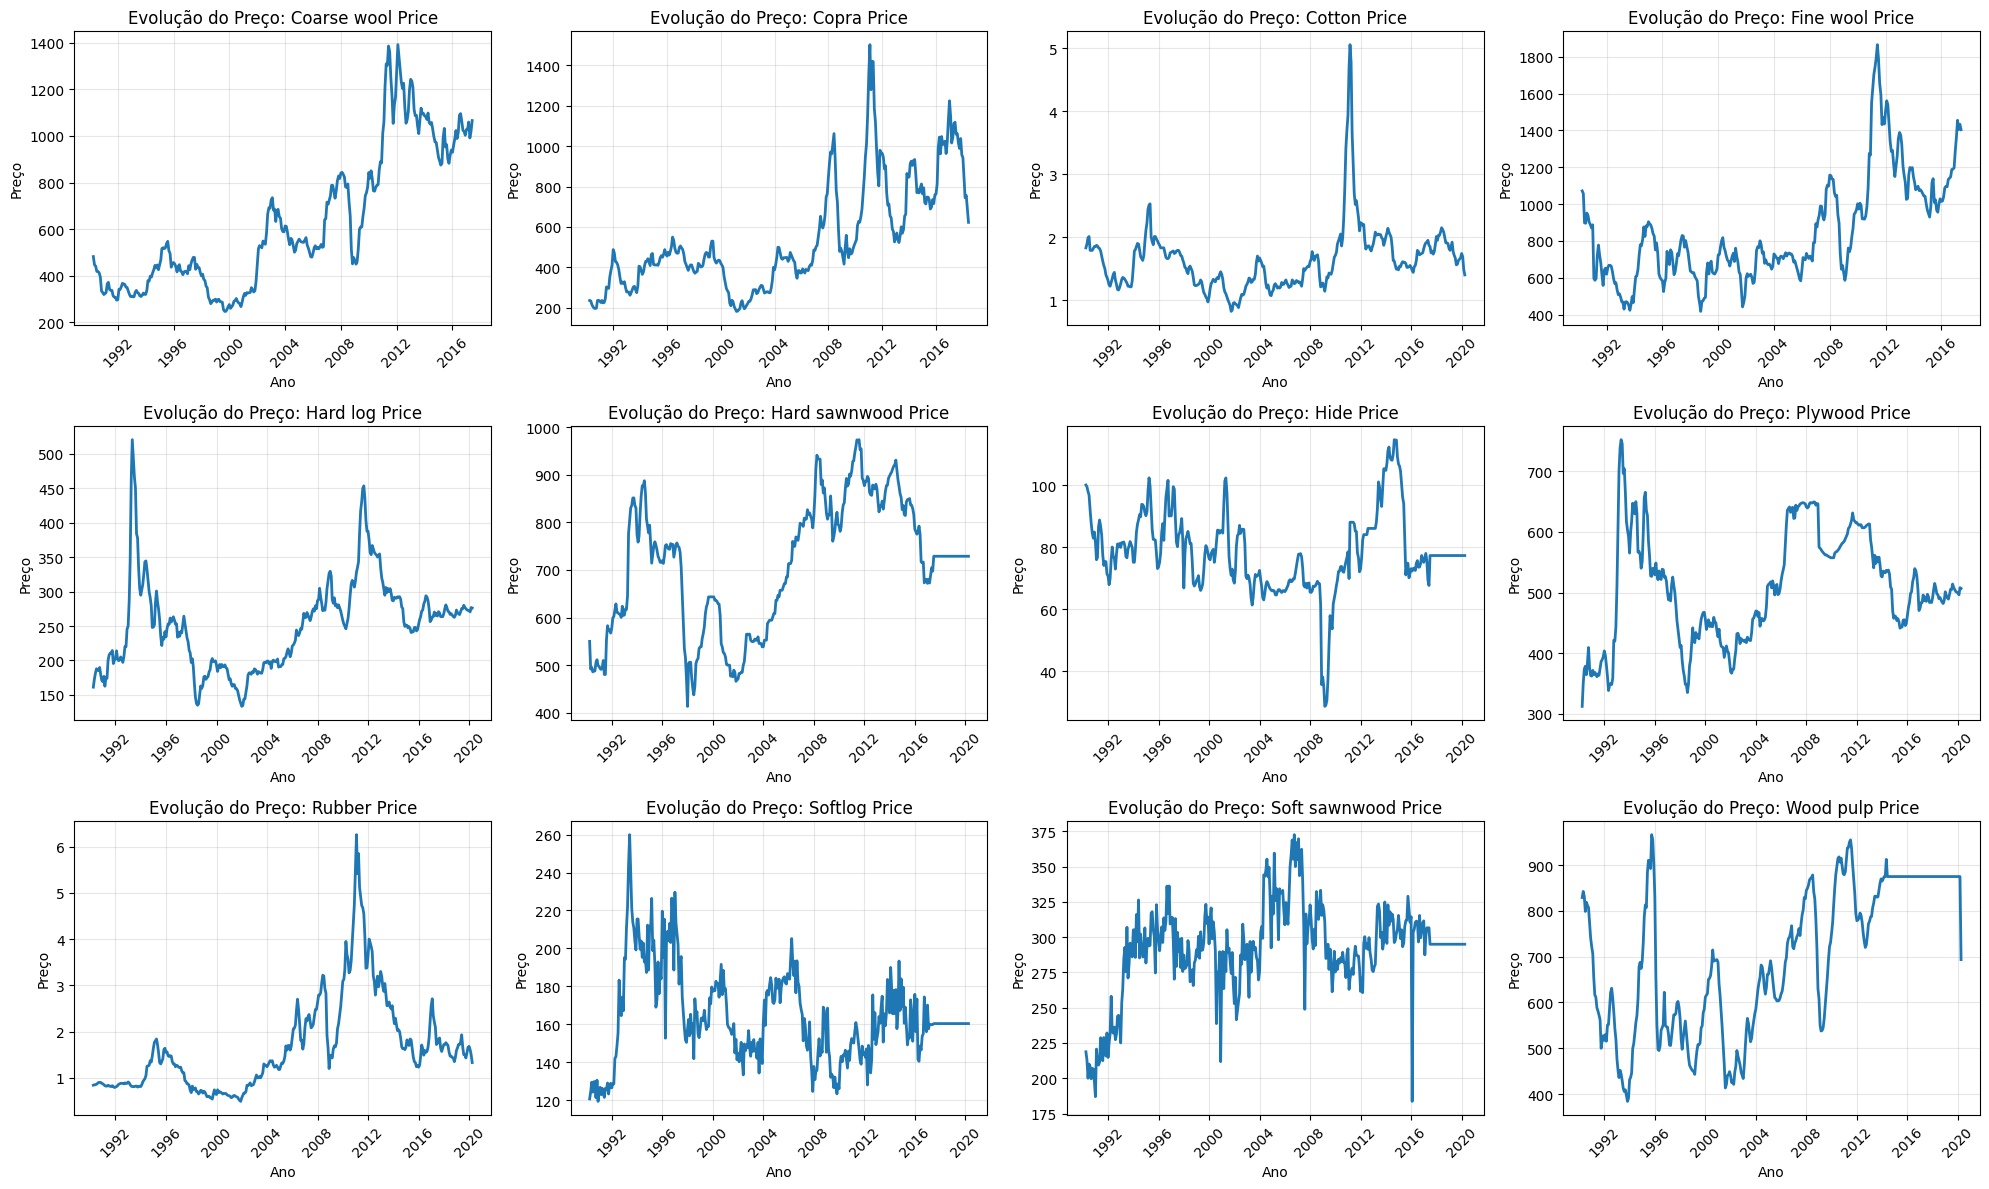

In [ ]:
# Análise de evolução temporal
plt.figure(figsize=(15, 10))

# Seleciona algumas commodities principais para análise
price_columns = [col for col in df_clean.columns if 'Price' in col and '% Change' not in col]

if not price_columns:
    print("Nenhuma coluna de preço foi encontrada no DataFrame.")
else:
    num_plots = len(price_columns)
    rows = (num_plots + 3) // 4
    cols = min(num_plots, 4)

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
    axes = axes.ravel() if num_plots > 1 else [axes]

    for i, commodity in enumerate(price_columns):
        if i < len(axes):
            axes[i].plot(df_clean['Month'], df_clean[commodity], linewidth=2)
            axes[i].set_title(f'Evolução do Preço: {commodity}')
            axes[i].set_xlabel('Ano')
            axes[i].set_ylabel('Preço')
            axes[i].tick_params(axis='x', rotation=45)
            axes[i].grid(True, alpha=0.3)


    for j in range(num_plots, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

In [ ]:
print("🎯 RESPOSTA 4 - DETECÇÃO DE OUTLIERS:")

def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return len(outliers)

print("Número de Outliers por Commodity (Método IQR):")
outliers_count = {}
price_columns = [col for col in df_clean.columns if 'Price' in col and '% Change' not in col]
for commodity in price_columns:
    outliers = detect_outliers_iqr(df_clean[commodity])
    outliers_count[commodity] = outliers
    print(f"   {commodity}: {outliers} outliers")

most_outliers_commodity = max(outliers_count, key=outliers_count.get)
print(f"\n💡 Commodity com mais outliers: {most_outliers_commodity}")

🎯 RESPOSTA 4 - DETECÇÃO DE OUTLIERS:
Número de Outliers por Commodity (Método IQR):
   Coarse wool Price: 0 outliers
   Copra Price: 5 outliers
   Cotton Price: 9 outliers
   Fine wool Price: 8 outliers
   Hard log Price: 10 outliers
   Hard sawnwood Price: 0 outliers
   Hide Price: 17 outliers
   Plywood Price: 0 outliers
   Rubber Price: 16 outliers
   Softlog Price: 6 outliers
   Soft sawnwood Price: 43 outliers
   Wood pulp Price: 0 outliers

💡 Commodity com mais outliers: Soft sawnwood Price


In [ ]:
volatility = df_change.drop('Month', axis=1).std()
print("📊 Volatilidade (Desvio Padrão) das Variações Percentuais:")
display(volatility)

📊 Volatilidade (Desvio Padrão) das Variações Percentuais:


,0
Coarse wool price % Change,5.277741
Copra price % Change,7.501848
Cotton price % Change,5.494846
Fine wool price % Change,6.717378
Hard log price % Change,4.513242
Hard sawnwood price % Change,3.327710
Plywood price % Change,3.349602
Rubber price % Change,7.429607
Softlog price % Change,7.234230
Soft sawnwood price % Change,7.619856


# Pergunta 1: Qual é a distribuição e variabilidade dos preços das principais commodities?

In [ ]:
print("📊 RESPOSTA 1 - DISTRIBUIÇÃO E VARIABILIDADE:")

# Análise das principais commodities
price_columns = [col for col in df_clean.columns if 'Price' in col and '% Change' not in col]

if not price_columns:
    print("Nenhuma das commodities selecionadas foi encontrada no DataFrame.")
else:
    stats_analysis = df_clean[price_columns].describe()

    print("Estatísticas Descritivas das Principais Commodities:")
    display(stats_analysis)

    # Calcula coeficiente de variação para medir variabilidade relativa
    cv_analysis = (df_clean[price_columns].std() / df_clean[price_columns].mean()) * 100
    print("\n📈 Coeficiente de Variação (CV %) - Medida de Variabilidade Relativa:")
    for commodity, cv in cv_analysis.items():
        print(f"   {commodity}: {cv:.1f}%")

📊 RESPOSTA 1 - DISTRIBUIÇÃO E VARIABILIDADE:
Estatísticas Descritivas das Principais Commodities:


,Coarse wool Price,Copra Price,Cotton Price,Fine wool Price,Hard log Price,Hard sawnwood Price,Hide Price,Plywood Price,Rubber Price,Softlog Price,Soft sawnwood Price,Wood pulp Price
count,327.000000,339.000000,361.000000,327.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000
mean,626.333731,542.023805,1.640000,850.119572,251.034072,709.905568,78.442659,508.216122,1.656427,164.135900,291.428864,696.662327
std,299.638838,269.419179,0.513319,285.075196,65.628406,137.701304,13.033781,89.274718,1.017086,24.387957,32.483094,160.933033
min,247.090000,182.000000,0.820000,417.470000,133.280000,413.370000,28.590000,312.360000,0.490000,119.350000,183.610000,384.000000
25%,369.620000,372.000000,1.290000,646.345000,197.960000,594.410000,70.110000,442.540000,0.860000,147.100000,280.660000,549.830000
50%,525.070000,458.000000,1.600000,748.180000,253.010000,728.710000,77.250000,505.040000,1.440000,160.370000,294.960000,693.580000
75%,847.120000,714.000000,1.850000,1019.870000,282.970000,820.210000,85.250000,570.790000,2.060000,178.290000,309.200000,875.000000
max,1391.470000,1503.000000,5.060000,1865.440000,520.810000,973.600000,114.630000,751.810000,6.260000,259.970000,372.600000,966.490000



📈 Coeficiente de Variação (CV %) - Medida de Variabilidade Relativa:
   Coarse wool Price: 47.8%
   Copra Price: 49.7%
   Cotton Price: 31.3%
   Fine wool Price: 33.5%
   Hard log Price: 26.1%
   Hard sawnwood Price: 19.4%
   Hide Price: 16.6%
   Plywood Price: 17.6%
   Rubber Price: 61.4%
   Softlog Price: 14.9%
   Soft sawnwood Price: 11.1%
   Wood pulp Price: 23.1%


# Pergunta 2: Quais commodities apresentam as maiores correlações e como isso impacta o mercado?

In [ ]:
print("🔗 RESPOSTA 2 - CORRELAÇÕES ENTRE COMMODITIES:")

strong_corr_count = 0
print("Principais Relações Identificadas:")
for corr in strong_correlations[:5]:
    if abs(corr[2]) > 0.6:
        print(f"   • {corr[0]} e {corr[1]}: correlação {corr[2]:.3f}")
        strong_corr_count += 1

if strong_corr_count > 0:
    print(f"\n💡 Insight: {strong_corr_count} pares de commodities mostram correlação forte.")
    print("   Isso sugere movimentos de mercado interconectados.")
else:
    print("\n💡 Insight: As commodities analisadas mostram comportamentos relativamente independentes.")

🔗 RESPOSTA 2 - CORRELAÇÕES ENTRE COMMODITIES:
Principais Relações Identificadas:
   • Coarse wool Price e Copra Price: correlação 0.801
   • Coarse wool Price e Fine wool Price: correlação 0.892
   • Coarse wool Price e Hard sawnwood Price: correlação 0.664

💡 Insight: 3 pares de commodities mostram correlação forte.
   Isso sugere movimentos de mercado interconectados.


# Pergunta 3: Como os preços evoluíram temporalmente e quais os períodos de maior volatilidade?

In [ ]:
print("📈 RESPOSTA 3 - ANÁLISE TEMPORAL E VOLATILIDADE:")

price_columns = [col for col in df_clean.columns if 'Price' in col and '% Change' not in col]

df_clean['Year'] = df_clean['Month'].dt.year
annual_volatility = df_clean.groupby('Year')[price_columns].std()

most_volatile_year = annual_volatility.mean(axis=1).idxmax()
max_volatility = annual_volatility.mean(axis=1).max()

print(f"📊 Ano de Maior Volatilidade: {most_volatile_year}")
print(f"💥 Volatilidade Média: {max_volatility:.2f}")


trend_analysis = {}
for commodity in price_columns:

    first_value = df_clean.loc[df_clean[commodity].first_valid_index(), commodity] if df_clean[commodity].first_valid_index() is not None else None
    last_value = df_clean.loc[df_clean[commodity].last_valid_index(), commodity] if df_clean[commodity].last_valid_index() is not None else None

    if first_value is not None and last_value is not None:
      trend = "↑ Alta" if last_value > first_value else "↓ Baixa"
      trend_analysis[commodity] = trend
    else:
        trend_analysis[commodity] = "Sem dados suficientes para determinar a tendência"


print("\n📊 Tendência Geral dos Preços:")
for commodity, trend in trend_analysis.items():
    print(f"   {commodity}: {trend}")

📈 RESPOSTA 3 - ANÁLISE TEMPORAL E VOLATILIDADE:
📊 Ano de Maior Volatilidade: 2008
💥 Volatilidade Média: 59.74

📊 Tendência Geral dos Preços:
   Coarse wool Price: ↑ Alta
   Copra Price: ↑ Alta
   Cotton Price: ↓ Baixa
   Fine wool Price: ↑ Alta
   Hard log Price: ↑ Alta
   Hard sawnwood Price: ↑ Alta
   Hide Price: ↓ Baixa
   Plywood Price: ↑ Alta
   Rubber Price: ↑ Alta
   Softlog Price: ↑ Alta
   Soft sawnwood Price: ↑ Alta
   Wood pulp Price: ↓ Baixa


# Pergunta 4: Quais são os outliers e valores extremos em cada commodity?

In [ ]:
print("🎯 RESPOSTA 4 - DETECÇÃO DE OUTLIERS:")

def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return len(outliers)

print("Número de Outliers por Commodity (Método IQR):")
outliers_count = {}
price_columns = [col for col in df_clean.columns if 'Price' in col and '% Change' not in col]

for commodity in price_columns:
    outliers = detect_outliers_iqr(df_clean[commodity])
    outliers_count[commodity] = outliers
    print(f"   {commodity}: {outliers} outliers")

most_outliers_commodity = max(outliers_count, key=outliers_count.get)
print(f"\n💡 Commodity com mais outliers: {most_outliers_commodity}")

🎯 RESPOSTA 4 - DETECÇÃO DE OUTLIERS:
Número de Outliers por Commodity (Método IQR):
   Coarse wool Price: 0 outliers
   Copra Price: 5 outliers
   Cotton Price: 9 outliers
   Fine wool Price: 8 outliers
   Hard log Price: 10 outliers
   Hard sawnwood Price: 0 outliers
   Hide Price: 17 outliers
   Plywood Price: 0 outliers
   Rubber Price: 16 outliers
   Softlog Price: 6 outliers
   Soft sawnwood Price: 43 outliers
   Wood pulp Price: 0 outliers

💡 Commodity com mais outliers: Soft sawnwood Price


# Pergunta 5: Qual é a qualidade geral dos dados e como isso impacta a análise?

In [ ]:
print("🧹 RESPOSTA 5 - QUALIDADE DOS DADOS:")

initial_nulls = df.isnull().sum().sum()
final_nulls = df_clean.isnull().sum().sum()
cleaned_percentage = ((initial_nulls - final_nulls) / initial_nulls * 100) if initial_nulls > 0 else 100

print(f"📊 Métricas de Qualidade:")
print(f"   • Valores nulos iniciais: {initial_nulls}")
print(f"   • Valores nulos após limpeza: {final_nulls}")
print(f"   • Dados limpos: {cleaned_percentage:.1f}%")
print(f"   • Período coberto: {df_clean['Month'].min().strftime('%Y-%m')} a {df_clean['Month'].max().strftime('%Y-%m')}")
print(f"   • Total de observações: {len(df_clean):,}")

if final_nulls == 0:
    print("✅ Qualidade dos dados: EXCELENTE - Pronto para análise")
else:
    print("⚠️  Qualidade dos dados: REQUER ATENÇÃO - Verificar dados restantes")

🧹 RESPOSTA 5 - QUALIDADE DOS DADOS:
📊 Métricas de Qualidade:
   • Valores nulos iniciais: 454
   • Valores nulos após limpeza: 329
   • Dados limpos: 27.5%
   • Período coberto: 1990-04 a 2020-04
   • Total de observações: 361
⚠️  Qualidade dos dados: REQUER ATENÇÃO - Verificar dados restantes


# Pergunta 6: Quais insights estratégicos podem ser extraídos para tomada de decisão?

In [ ]:
print("💡 RESPOSTA 6 - INSIGHTS ESTRATÉGICOS:")

# Análise de melhores e piores períodos
recent_data = df_clean[df_clean['Month'] > '2015-01-01']
price_columns = [col for col in df_clean.columns if 'Price' in col and '% Change' not in col]
best_performers = recent_data[price_columns].mean().sort_values(ascending=False)

print("🏆 Commodities com Melhor Performance (Pós-2015):")
for i, (commodity, value) in enumerate(best_performers.items(), 1):
    print(f"   {i}. {commodity}: ${value:.2f}")

# Recomendações baseadas em dados
print("\n🎯 Recomendações Estratégicas:")
print("   • Diversificação: Commodities com baixa correlação reduzem risco")
print("   • Timing: Considerar sazonalidade e volatilidade histórica")
print("   • Monitoramento: Acompanhar commodities com alta volatilidade")

💡 RESPOSTA 6 - INSIGHTS ESTRATÉGICOS:
🏆 Commodities com Melhor Performance (Pós-2015):
   1. Fine wool Price: $1131.08
   2. Coarse wool Price: $986.77
   3. Copra Price: $907.82
   4. Wood pulp Price: $872.12
   5. Hard sawnwood Price: $744.92
   6. Plywood Price: $488.78
   7. Soft sawnwood Price: $298.46
   8. Hard log Price: $266.48
   9. Softlog Price: $159.94
   10. Hide Price: $77.83
   11. Cotton Price: $1.75
   12. Rubber Price: $1.67

🎯 Recomendações Estratégicas:
   • Diversificação: Commodities com baixa correlação reduzem risco
   • Timing: Considerar sazonalidade e volatilidade histórica
   • Monitoramento: Acompanhar commodities com alta volatilidade


# Pergunta 7: Como a análise pode ser expandida e quais são as limitações atuais?

In [1]:
print("🚀 RESPOSTA 7 - EXPANSÃO E LIMITAÇÕES:")

print("📈 Próximos Passos para Análise Avançada:")
next_steps = [
    "Análise de sazonalidade usando decomposição temporal",
    "Modelos de previsão (ARIMA, Prophet) para forecasting",
    "Inclusão de variáveis macroeconômicas externas",
    "Análise de causalidade e relações de longo prazo",
    "Dashboard interativo para monitoramento em tempo real"
]

for i, step in enumerate(next_steps, 1):
    print(f"   {i}. {step}")

print("\n⚠️  Limitações Atuais:")
limitations = [
    "Dados históricos limitados a preços nominais",
    "Falta de ajuste por inflação",
    "Variáveis externas não incluídas",
    "Período de análise específico"
]

for i, limitation in enumerate(limitations, 1):
    print(f"   {i}. {limitation}")

🚀 RESPOSTA 7 - EXPANSÃO E LIMITAÇÕES:
📈 Próximos Passos para Análise Avançada:
   1. Análise de sazonalidade usando decomposição temporal
   2. Modelos de previsão (ARIMA, Prophet) para forecasting
   3. Inclusão de variáveis macroeconômicas externas
   4. Análise de causalidade e relações de longo prazo
   5. Dashboard interativo para monitoramento em tempo real

⚠️  Limitações Atuais:
   1. Dados históricos limitados a preços nominais
   2. Falta de ajuste por inflação
   3. Variáveis externas não incluídas
   4. Período de análise específico
